## **DATA VISUALIZATION FOR IPL DATASET**

**Introduction**

This dataset has information on all matches playes between different teams. It has a match by match detail, which teams played it, when was it played, who won, by how many runs or wickets, where was it played, etc.

**Importing the required Packages**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the Dataset**

In [ ]:
df = pd.read_csv("Matches.csv")
df.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


**Shape of the Dataset**

In [ ]:
df.shape

(816, 17)

**Describe the Data**

In [ ]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


**Information of the Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

**Extracting the numerical features of the data**

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!="O"]
numerical_feature

['id', 'neutral_venue', 'result_margin']

# **Data Visualizations**

**Scatter Plot**

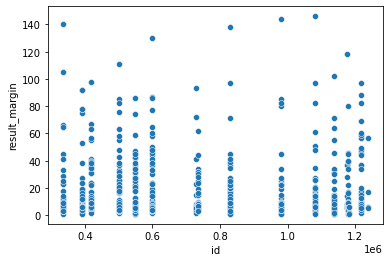

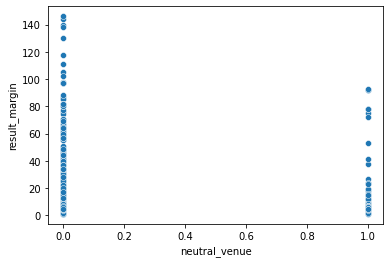

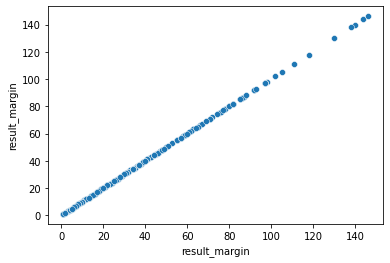

In [ ]:
for feature in numerical_feature:
    sns.scatterplot(x = df[feature], y = df['result_margin'])
    plt.show()

**Histogram, Displot & Boxplot**

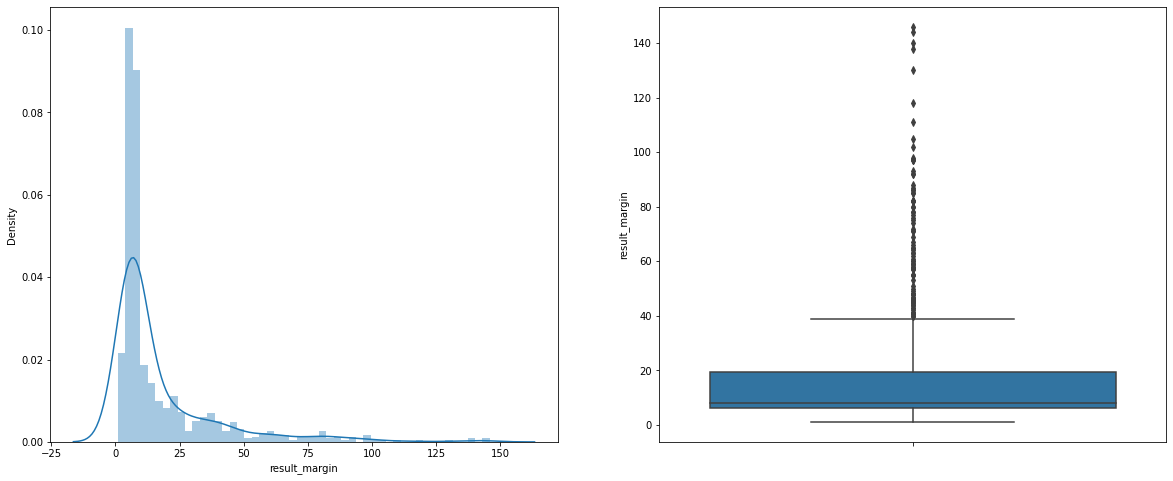

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df.result_margin)

plt.subplot(1,2,2)
sns.boxplot(y=df.result_margin)

plt.show()

**Which is the most frequent venue where atleat 10 matches have been played?**

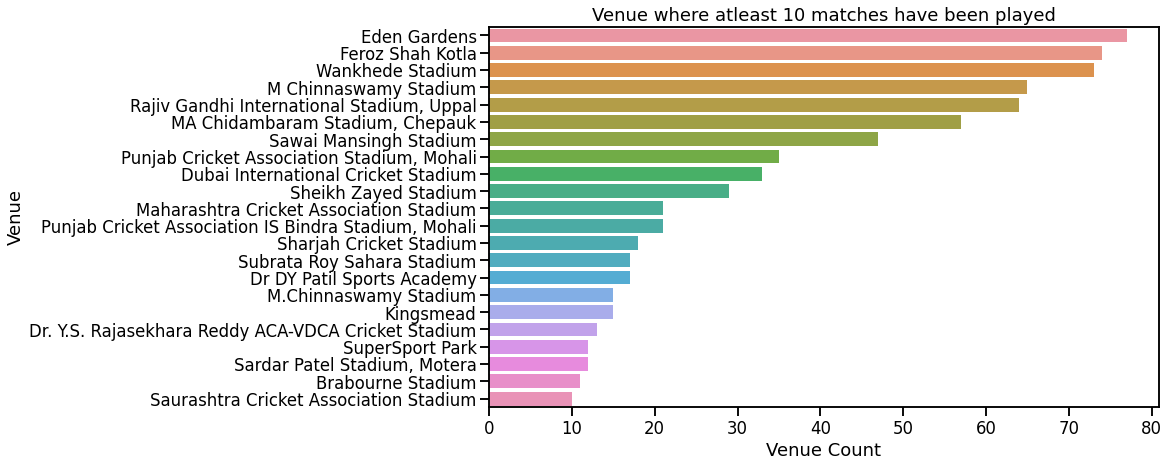

In [ ]:
sns.set_context("talk")
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x=df['venue'].value_counts().head(22).values,
           y= df['venue'].value_counts().head(22).index,
           data=df)

plt.title('Venue where atleast 10 matches have been played')
plt.xlabel('Venue Count')
plt.ylabel('Venue')
plt.show()

**How Toss Decision affects match result?**

Text(0, 0.5, 'Frequency')

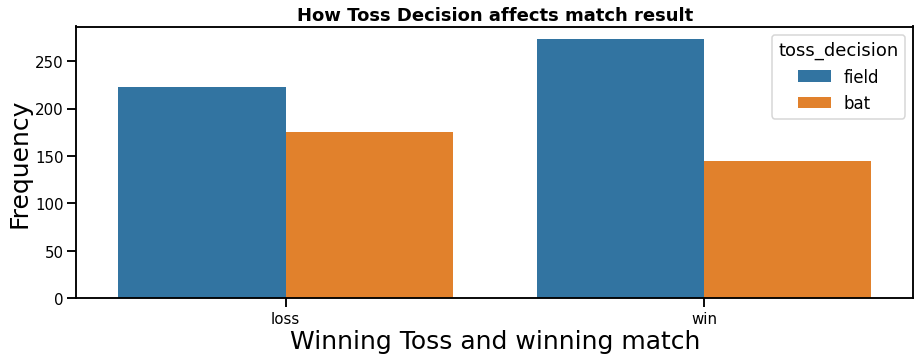

In [ ]:
# create a column which store 'win' if a team win a match &
df['toss_win_game_win'] = np.where((df.toss_winner == df.winner),'win','loss')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=df, hue = 'toss_decision',)
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

**Which team won more number of toss in IPL?**

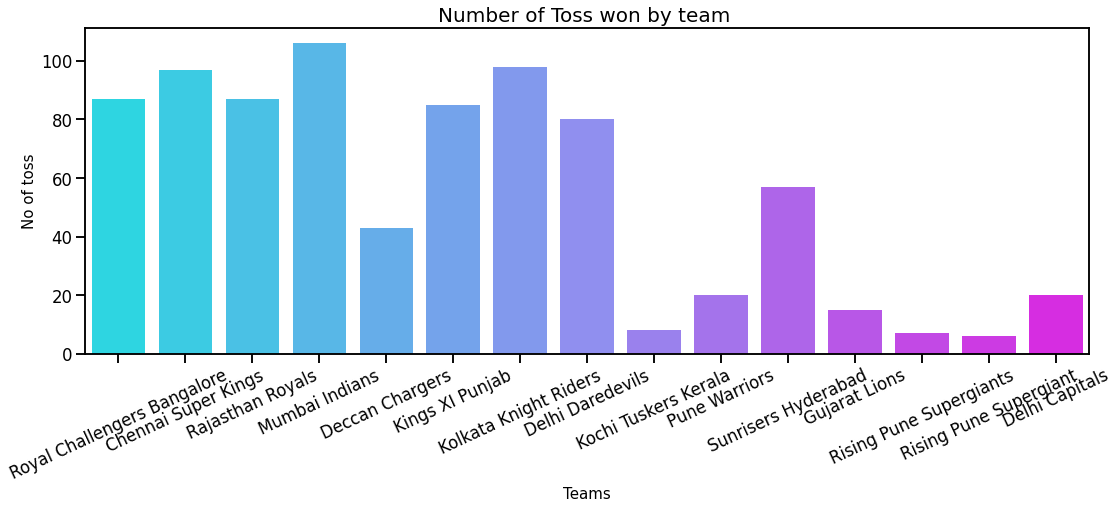

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x='toss_winner',data=df, palette='cool')
plt.title("Number of Toss won by team ",fontsize=20)
plt.xticks(rotation=25)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of toss",fontsize=15)
plt.show()

**Which team won more number of toss in IPL according to the venue?**

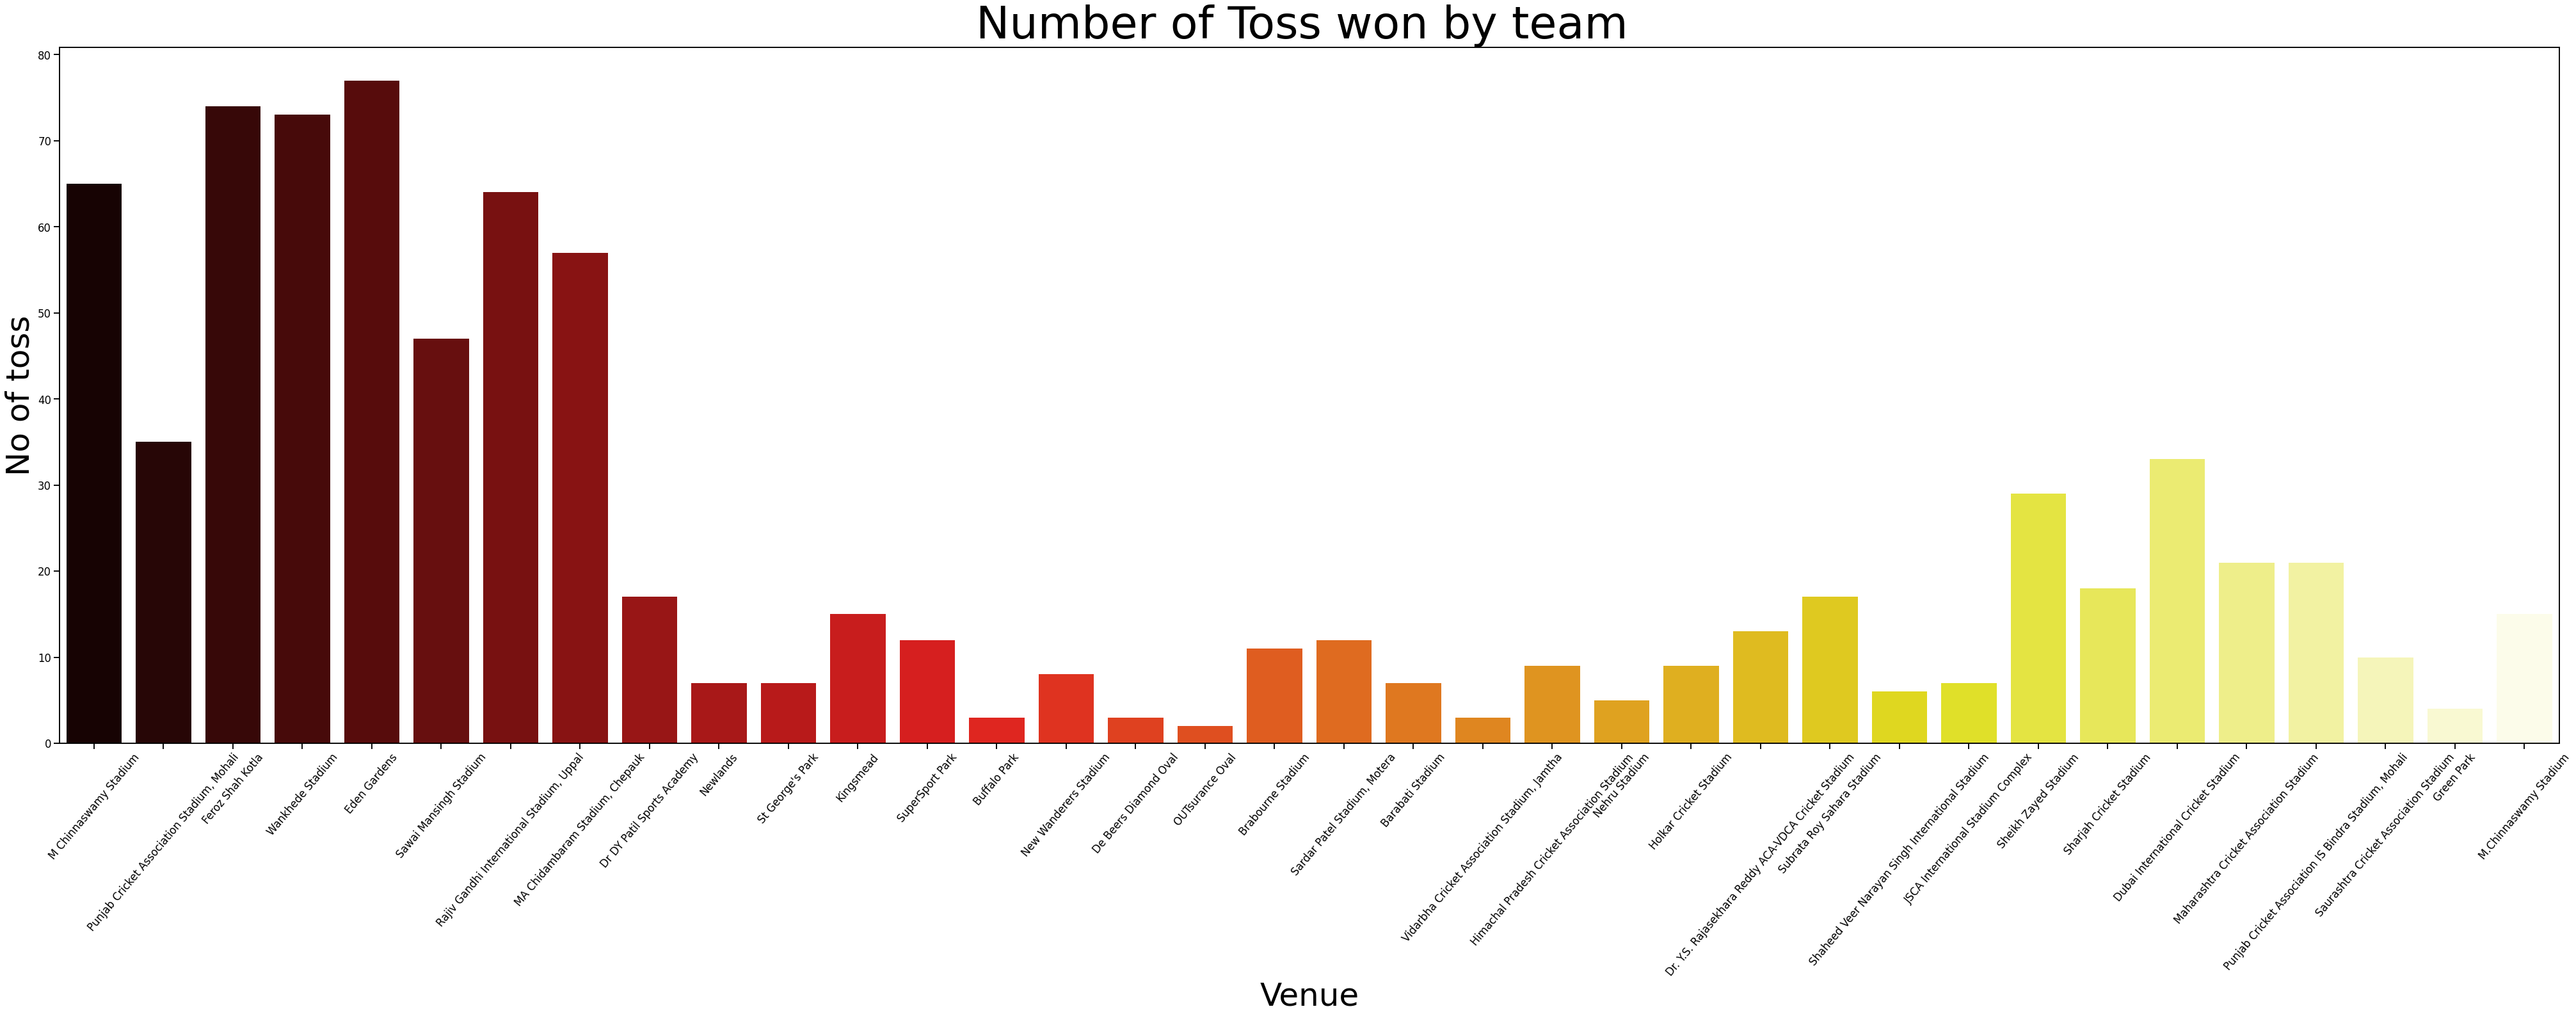

In [ ]:
plt.figure(figsize = (70,20))
sns.countplot(x='venue',data=df, palette='hot')
plt.title("Number of Toss won by team ",fontsize=70)
plt.xticks(rotation=50)
plt.xlabel("Venue",fontsize=50)
plt.ylabel("No of toss",fontsize=50)
plt.show()

**How many times a particular team has won the match?**

In [ ]:
df1=df['winner'].value_counts()
df1

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**Which city has hosted more number of matches in IPL?**

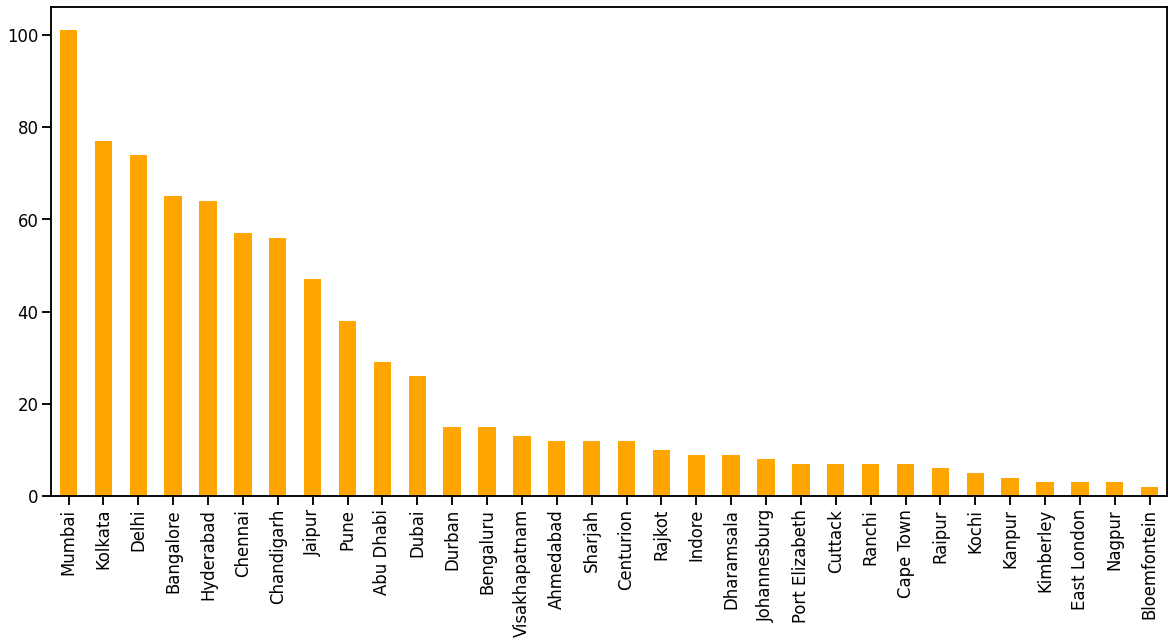

In [ ]:
plt.figure(figsize=(20,9))
df['city'].value_counts().plot(kind='bar', color="orange")

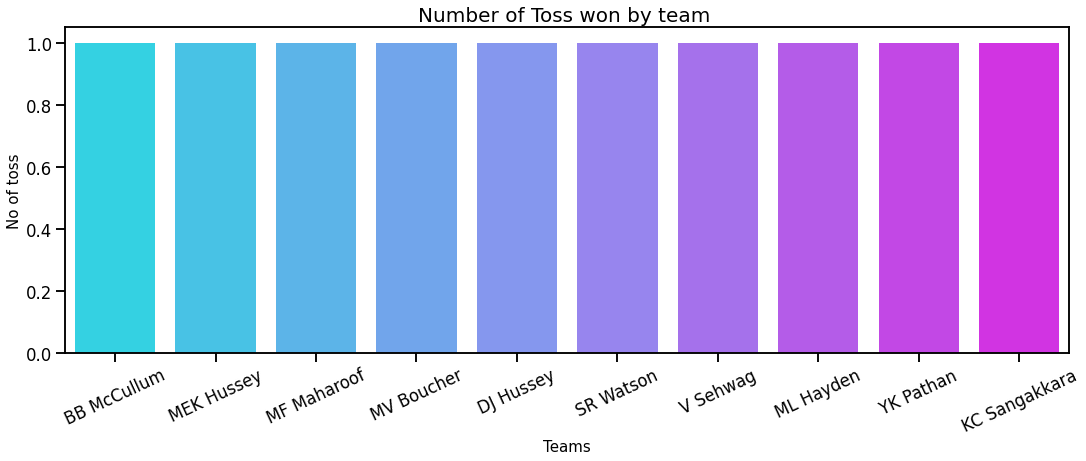

In [ ]:
plt.figure(figsize = (18,6))
sns.countplot(x='player_of_match',data=df[0:10], palette='cool')
plt.title("Number of Toss won by team ",fontsize=20)
plt.xticks(rotation=25)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of toss",fontsize=15)
plt.show()

Text(0, 0.5, 'Frequency')

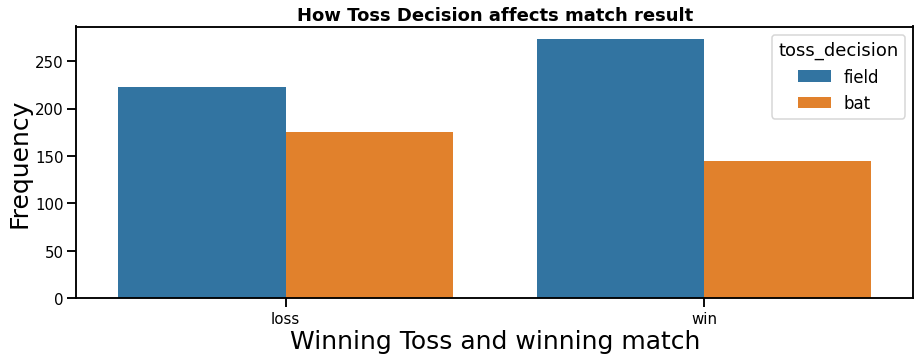

In [ ]:
# create a column which store 'win' if a team win a match &
df['venue'] = np.where((df.toss_winner == df.winner),'win','loss')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=df, hue = 'toss_decision',)
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

**Who are the Top 15 Player of the match in IPL?**

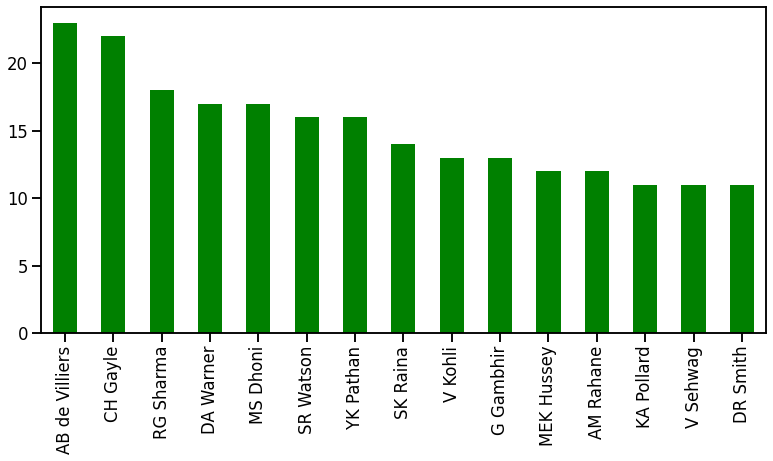

In [ ]:
plt.figure(figsize=(13,6))
df['player_of_match'].value_counts()[0:15].plot(kind='bar', color="green")

**Who are the top most participlated Umpire in IPL?**

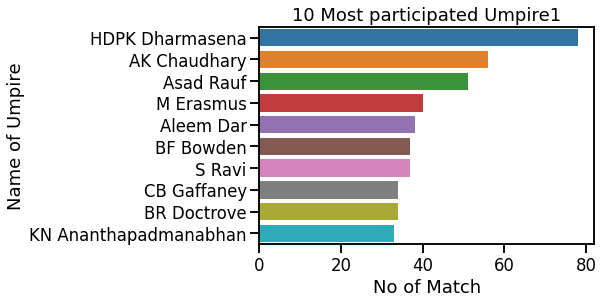

In [ ]:
sns.barplot(x=df['umpire1'].value_counts().head(10).values,
            y=df['umpire1'].value_counts().head(10).index,
            data= df
           )
plt.xlabel("No of Match")
plt.ylabel("Name of Umpire")
plt.title('10 Most participated Umpire1')
plt.show()

**which team won most matches by batting second?**

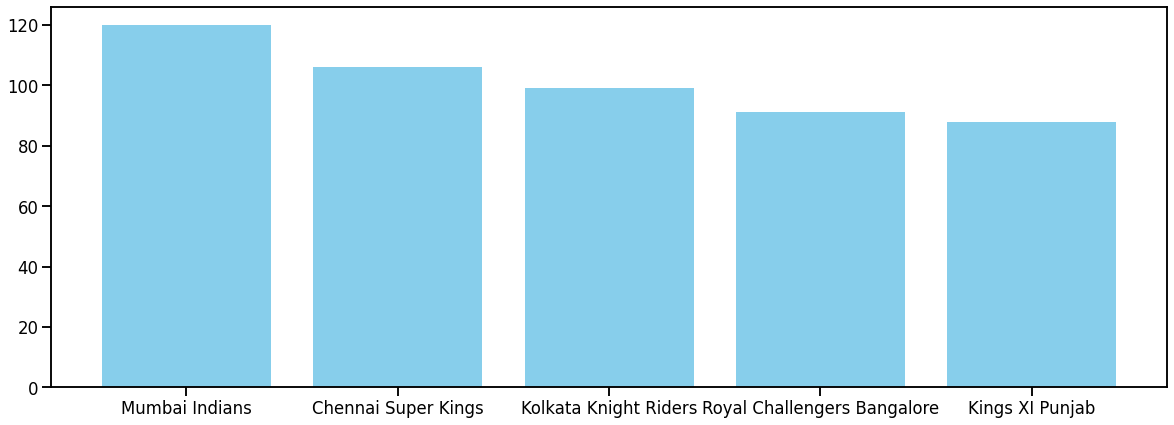

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(list(df['winner'].value_counts()[0:5].keys()) , list(df['winner'].value_counts()[0:5]),color='skyblue')
plt.show()

**How many numbers of time match winners is the toss winners?**

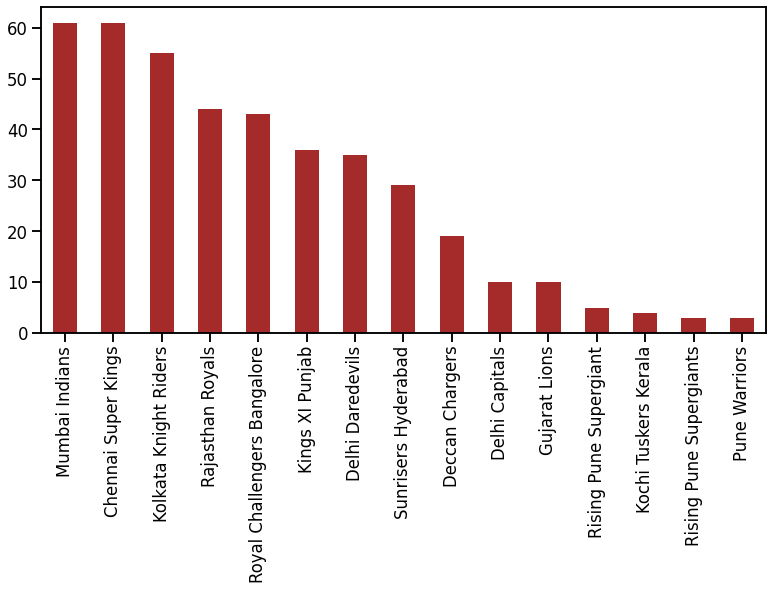

In [ ]:
plt.figure(figsize=(13,6))
df.loc[df.toss_winner==df.winner,'winner'].value_counts().plot(kind='bar',color="brown")


**How many numbers of time match winner is the toss losers?**

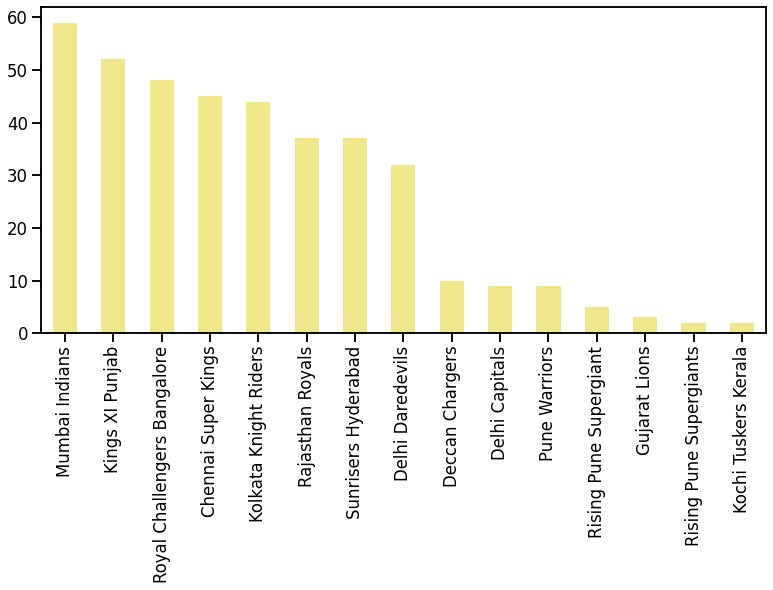

In [ ]:
plt.figure(figsize=(13,6))
df.loc[df.toss_winner!=df.winner,'winner'].value_counts().plot(kind='bar', color="khaki")

**Which IPL team has acheived more number of wins?**

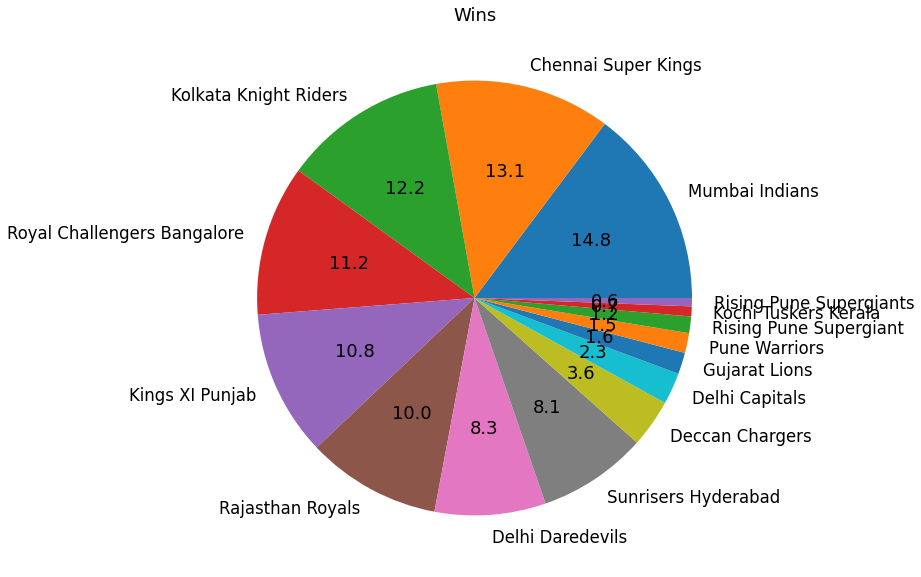

In [ ]:
temp = pd.DataFrame({'Winner': df['winner']})
count_win = temp.value_counts()

labels= [I[0] for I in count_win.keys()]


#count_win.bar()
'''plt.bar(count_win)
plt.show()'''

bar, ax= plt.subplots(figsize=(10,10))
ax=plt.pie(x=count_win, autopct="%.1f", labels= labels)
plt.title("Wins")
plt.show()

no of matches
team- Maximum no of games
Won/lost
won/lost the toss
bat first or bowl first
game influenced by bowler of batsman or both


**Who are the top players of the match with respect to city?**

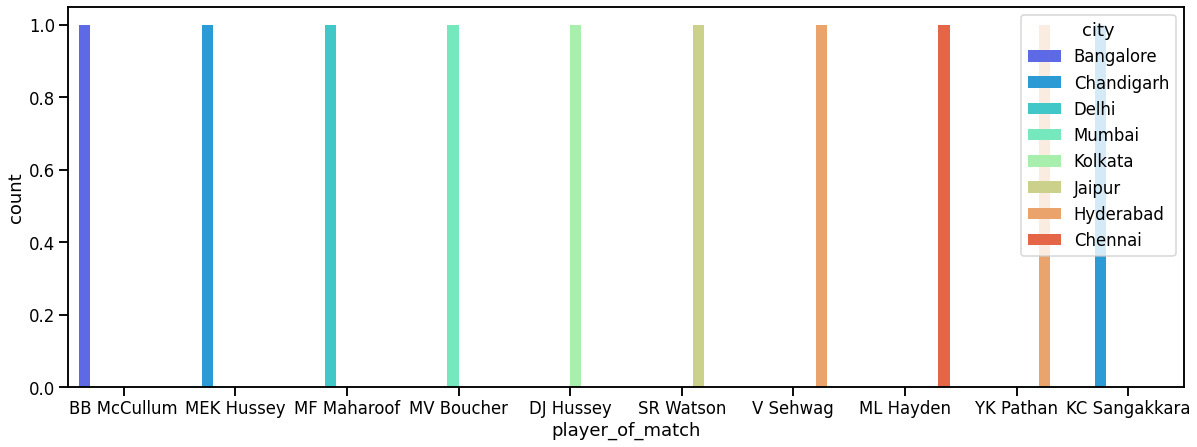

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='player_of_match',data=df[0:10], palette='rainbow',hue='city')

**Which city scored more runs as well as wickets?**

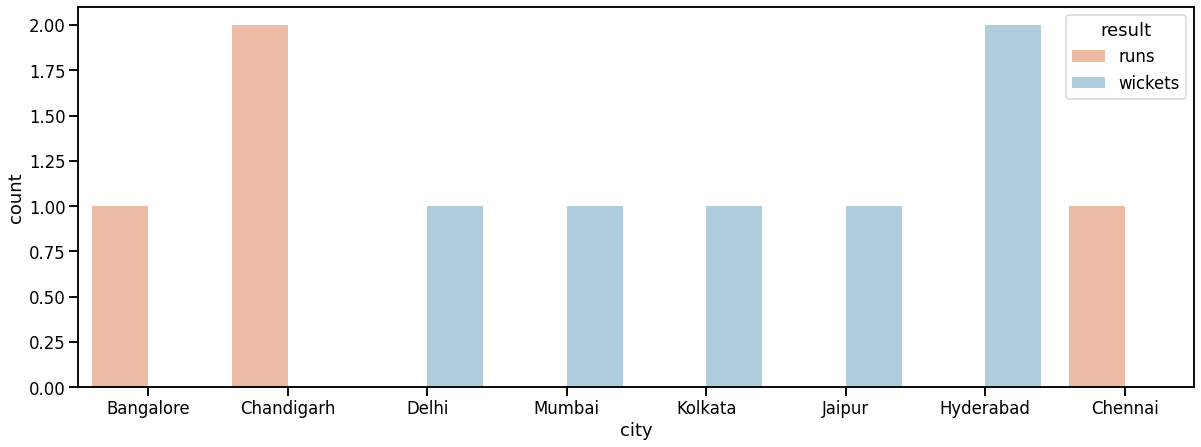

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='city',data=df[0:10], palette='RdBu',hue='result')

**Which IPL team either took more runs or wickets with respect to team1?**

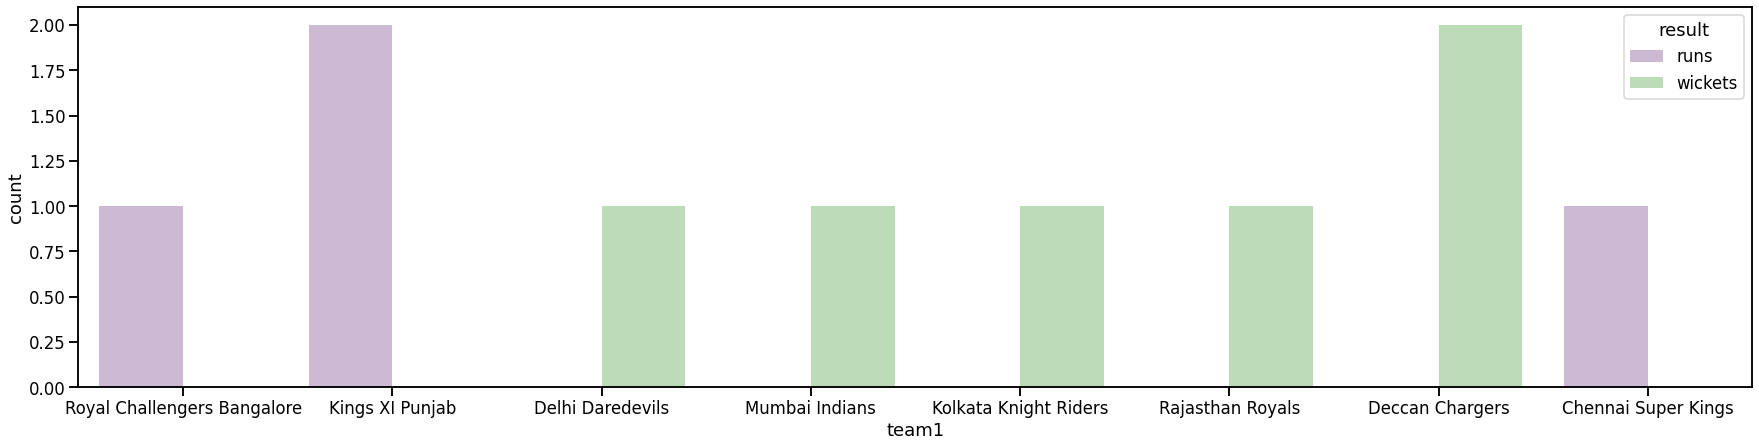

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(x='team1',data=df[0:10], palette='PRGn',hue='result')

**Which IPL team either took more runs or wickets with respect to team2?**

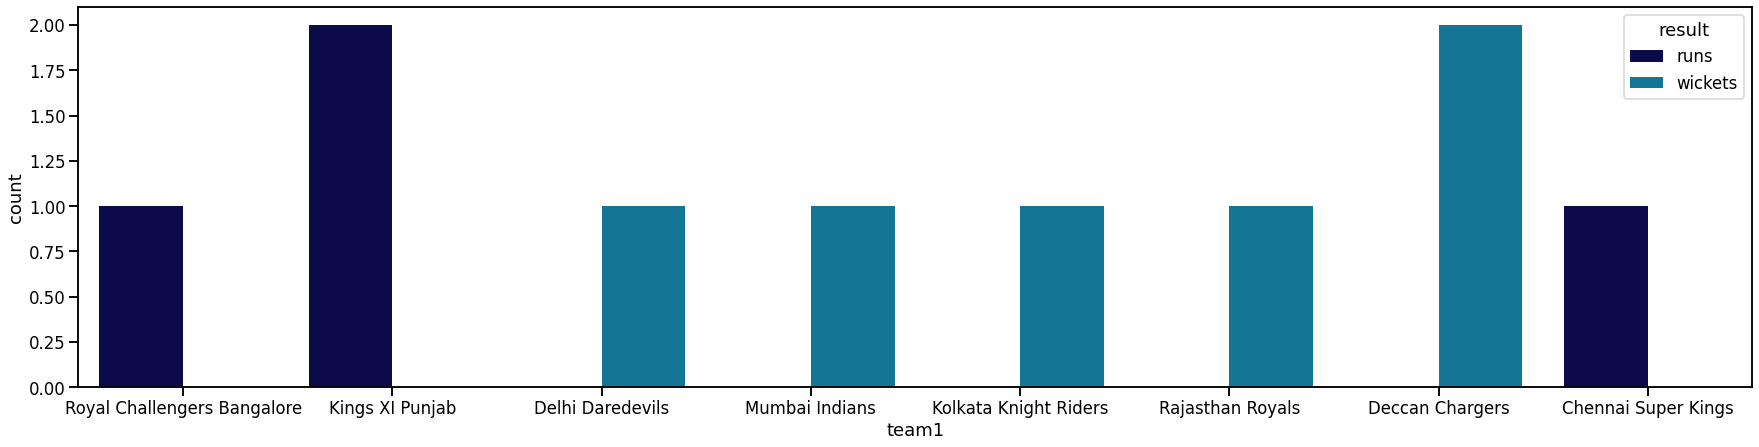

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(x='team1',data=df[0:10], palette='ocean',hue='result')

**How the toss decision affects the winners?**

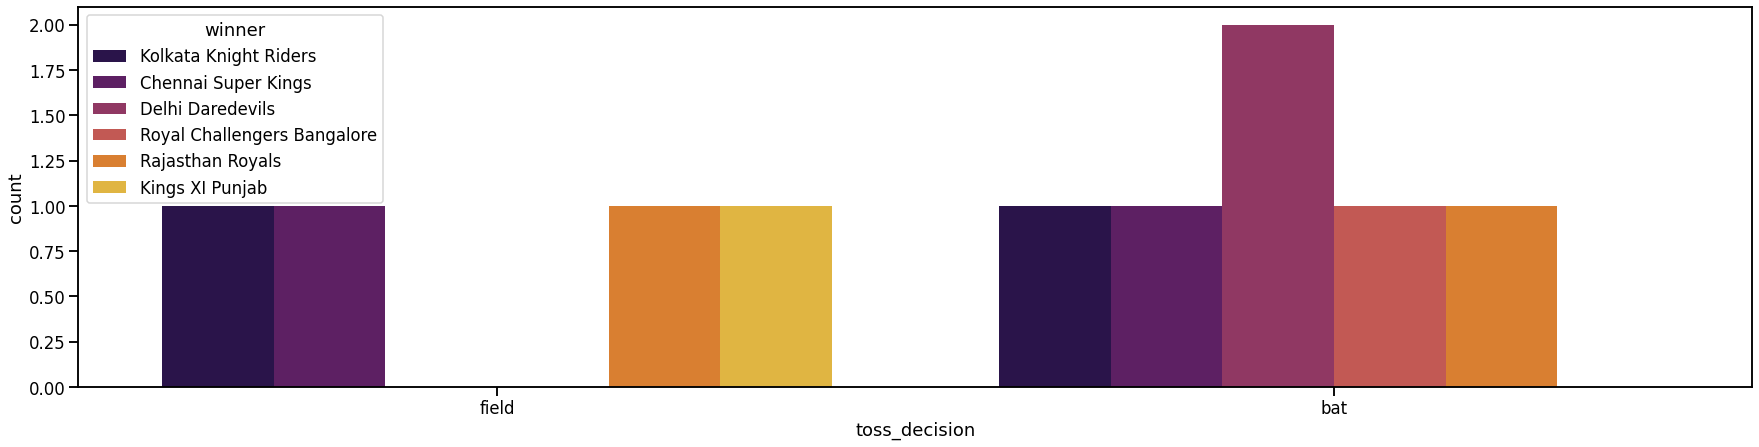

In [ ]:
plt.figure(figsize=(30,7))
sns.countplot(x='toss_decision',data=df[0:10], palette='inferno',hue='winner')

**Who is the most participated Umpire2 according to the city?**



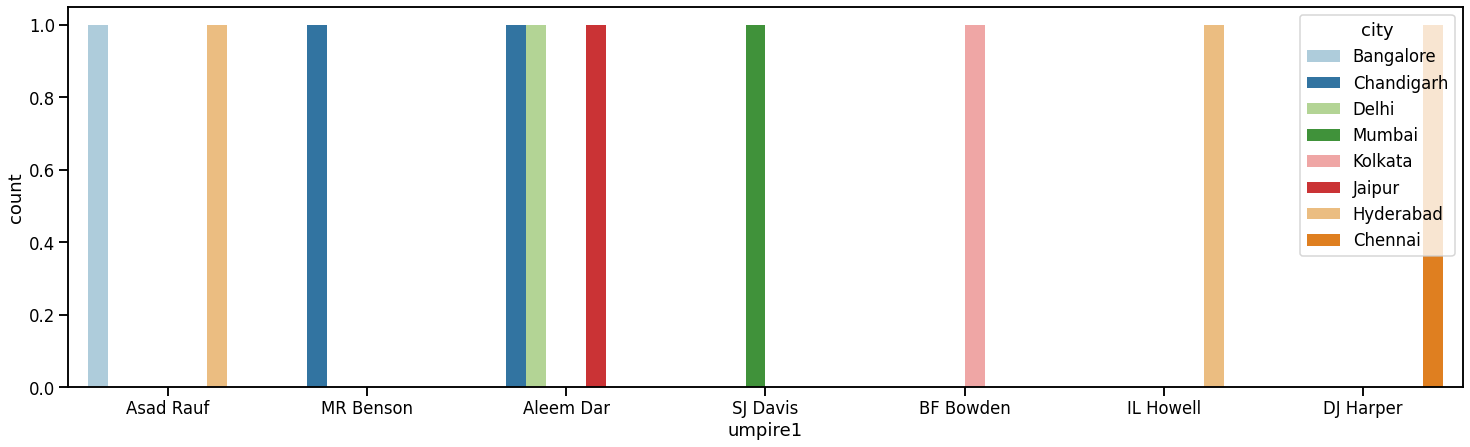

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='umpire1',data=df[0:10], palette='Paired',hue='city')

**Who is the most participated Umpire2 according to the city?**



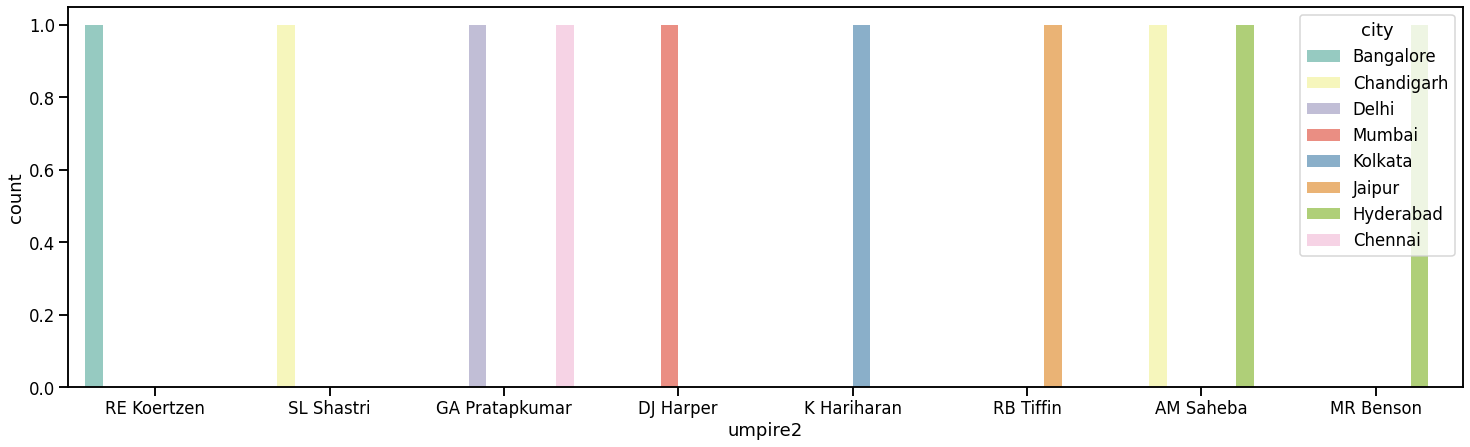

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x='umpire2',data=df[0:10], palette='Set3',hue='city')